In [ ]:
#importing all necessary labraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
#importing excel file 

In [3]:
df=pd.read_excel("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/forecasting/Airlines+Data.xlsx")
df
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
df.shape

(96, 2)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


In [7]:
list(df)

['Month', 'Passengers']

In [8]:
df["months"]=df.Month.dt.strftime("%b")
df

,Month,Passengers,months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May
...,...,...,...
91,2002-08-01,405,Aug
92,2002-09-01,355,Sep
93,2002-10-01,306,Oct
94,2002-11-01,271,Nov


In [9]:
df["year"]=df.Month.dt.strftime("%Y")
df

,Month,Passengers,months,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [11]:
df.drop(["Month"],axis=1,inplace=True)

df

,Passengers,months,year
0,112,Jan,1995
1,118,Feb,1995
2,132,Mar,1995
3,129,Apr,1995
4,121,May,1995
...,...,...,...
91,405,Aug,2002
92,355,Sep,2002
93,306,Oct,2002
94,271,Nov,2002


In [12]:
df.set_index(["year"])

,Passengers,months
year,,
1995,112,Jan
1995,118,Feb
1995,132,Mar
1995,129,Apr
1995,121,May
...,...,...
2002,405,Aug
2002,355,Sep
2002,306,Oct


In [13]:
#data visualisation

<Axes: xlabel='months', ylabel='year'>

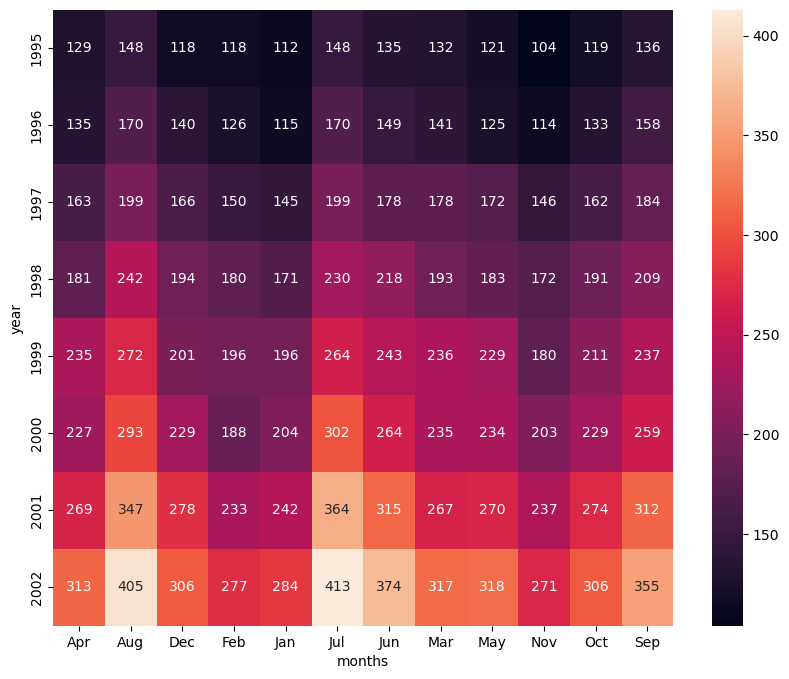

In [14]:
plt.figure(figsize=(10, 8))
heatmap_y_month = pd.pivot_table(data=df, values="Passengers", index="year", columns="months", fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt="g")


In [15]:
#boxplot


<Axes: xlabel='months', ylabel='Passengers'>

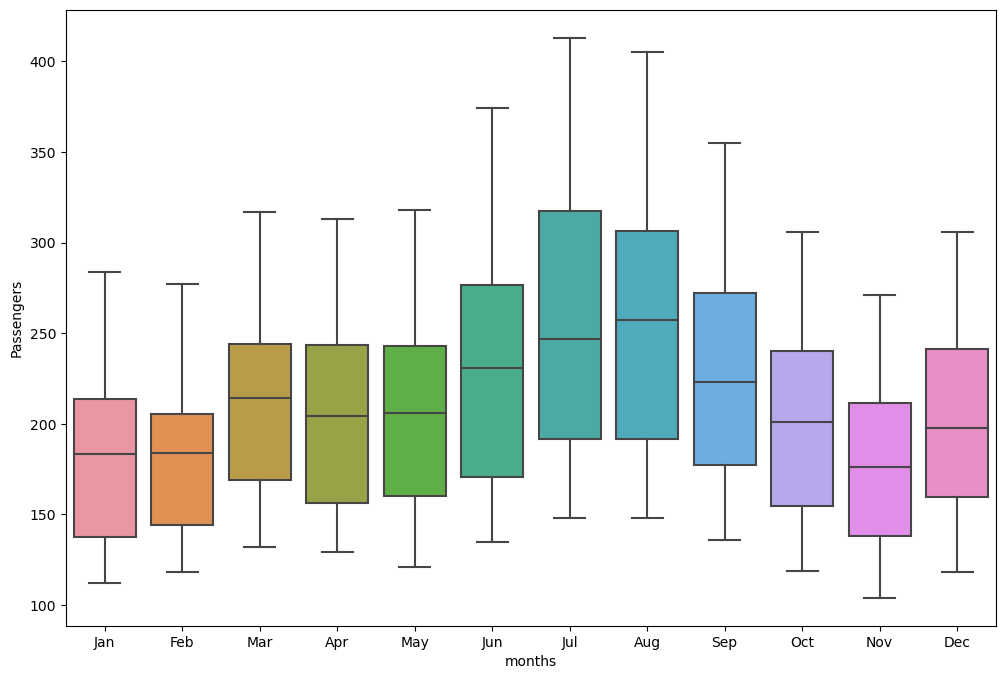

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x="months",y="Passengers",data=df)


<Axes: xlabel='year', ylabel='Passengers'>

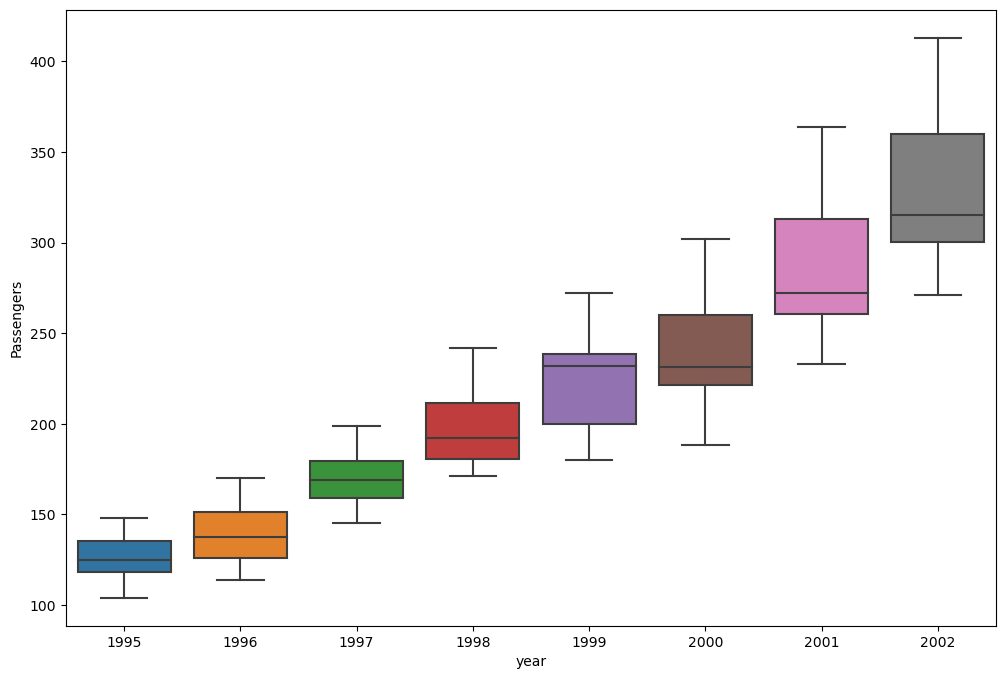

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x="year",y="Passengers",data=df)


In [18]:
df["t"]=np.arange(1,len(df)+1)
df["t_square"]=df["t"]**2
dummy=pd.DataFrame(pd.get_dummies(df["months"]))
df1=pd.concat([df, dummy.astype(int)],axis=1)

df1.head()

,Passengers,months,year,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112,Jan,1995,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,118,Feb,1995,2,4,0,0,0,1,0,0,0,0,0,0,0,0
2,132,Mar,1995,3,9,0,0,0,0,0,0,0,1,0,0,0,0
3,129,Apr,1995,4,16,1,0,0,0,0,0,0,0,0,0,0,0
4,121,May,1995,5,25,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
#spliting the train and testing


In [20]:
train=df1.head(96)
test=df1.tail(19)
df1.columns

Index(['Passengers', 'months', 'year', 't', 't_square', 'Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [21]:
#forecasting models


In [22]:
#linear model
linear_model=smf.ols('Passengers~ t',data=df).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean(np.array(test['Passengers'])-np.array(pred_linear))**2)
rmse_linear

15.668396183758402

In [23]:
#exponential
Exp = smf.ols('np.log(Passengers) ~ t', data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.65546067622673

In [24]:
# Quadratic
Quad = smf.ols('Passengers ~ t + t_square', data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[['t', 't_square']]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(pred_Quad))**2))
rmse_Quad

46.24270064334748

In [25]:
# Additive seasonality
add_sea = smf.ols('Passengers ~ Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep', data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(pred_add_sea))**2))
rmse_add_sea

104.43541034635011

In [26]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers ~ t + t_square + Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep', data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['t', 't_square', 'Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

18.28773499893604

In [27]:
# Multiplicative Seasonality
Mul_sea = smf.ols('np.log(Passengers) ~  Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep', data=train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test[['Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

114.85234202889075

In [28]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('np.log(Passengers) ~  t + Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep', data=train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test[['t', 'Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

8.512781524003705

In [29]:
# Compare the results

In [30]:
data = {"MODEL": pd.Series(["rmse_linear", "rmse_Exp", "rmse_Quad", "rmse_add_sea", "rmse_add_sea_quad", "rmse_Mult_sea", "rmse_Mult_add_sea"]),
        "RMSE_Values": pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add_sea, rmse_add_sea_quad, rmse_Mult_sea, rmse_Mult_add_sea])}


In [31]:
data

{'MODEL': 0          rmse_linear
 1             rmse_Exp
 2            rmse_Quad
 3         rmse_add_sea
 4    rmse_add_sea_quad
 5        rmse_Mult_sea
 6    rmse_Mult_add_sea
 dtype: object,
 'RMSE_Values': 0     15.668396
 1     46.655461
 2     46.242701
 3    104.435410
 4     18.287735
 5    114.852342
 6      8.512782
 dtype: float64}

In [32]:
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,8.512782
0,rmse_linear,15.668396
4,rmse_add_sea_quad,18.287735
2,rmse_Quad,46.242701
1,rmse_Exp,46.655461
3,rmse_add_sea,104.435410
5,rmse_Mult_sea,114.852342


In [33]:
''''Finally by seeing the above RMSE Values we can see that the Multiplicative Additive Seasonality
is the best model to forecast for the given data set.'''

"'Finally by seeing the above RMSE Values we can see that the Multiplicative Additive Seasonality\nis the best model to forecast for the given data set."